<a href="https://colab.research.google.com/github/rheazh/Data-Analysis/blob/main/unit_9_final_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [3]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt


In [7]:
# Fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Data
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).squeeze()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Multi-layer non-linear
model_1 = nn.Sequential(
    nn.Linear(in_features=4, out_features=32),
    nn.RReLU(),
    # hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),
    # moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),
    # hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4),
    nn.RReLU(),
    # hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1),
)

In [9]:
# Create a loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001)

epochs = 2000

In [10]:
for epoch in range(epochs):
    # Training
    model_1.train()
    # makes predictions
    y_pred = model_1(X_train)
    # Calculate loss
    loss = loss_fn(y_pred.squeeze(), y_train)
    # resets how change model
    optimizer.zero_grad()
    # loss backwards
    loss.backward()
    # Optimizer step
    optimizer.step()
    # Testing
    model_1.eval()  # forces matrices to stay the same
    with torch.inference_mode():
        # makes predictions, but with test data
        test_pred = model_1(X_test)
        # Calculate the loss but with test data
        test_loss = loss_fn(test_pred, y_test)
    # Print
    if epoch % 200 == 0:  # prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

#evaluation mode
model_1.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_1(X_test)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1914])) that is different to the input size (torch.Size([1914, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 210795.20312, Test loss: 112660.32812
Epoch: 200 | Train loss: nan, Test loss: nan
Epoch: 400 | Train loss: nan, Test loss: nan
Epoch: 600 | Train loss: nan, Test loss: nan
Epoch: 800 | Train loss: nan, Test loss: nan
Epoch: 1000 | Train loss: nan, Test loss: nan
Epoch: 1200 | Train loss: nan, Test loss: nan
Epoch: 1400 | Train loss: nan, Test loss: nan
Epoch: 1600 | Train loss: nan, Test loss: nan
Epoch: 1800 | Train loss: nan, Test loss: nan


The initial test loss is very high and both the train loss and the test loss become nan by epoch 200. This suggests the model's weights are diverging.

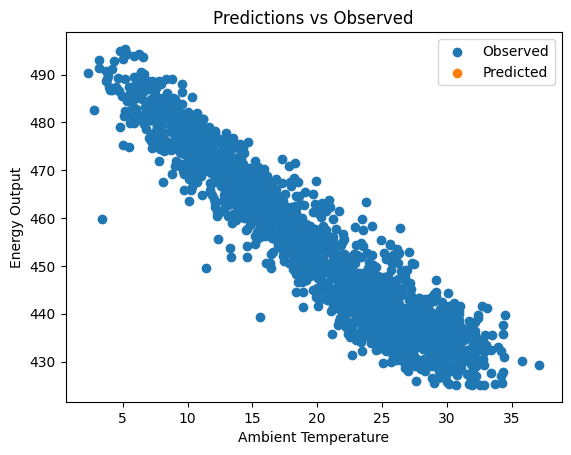

In [14]:
# Plots predictions
plt.figure()
plt.scatter(X_test[:, 0].detach().numpy(), y_test.detach().numpy(), label='Observed')
plt.scatter(X_test[:, 0].detach().numpy(), y_preds.detach().numpy(), label='Predicted')
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output')
plt.title('Predictions vs Observed')
plt.legend()

Only the observed data is showing up on the graph. I don't really know what is going on.

In [15]:
# Fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Data
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

# Manual normalization: divide each feature and target by their maximum value
X = X / X.max()
y = y / y.max()

I added manual normalization to scale the output to [0,1]. Hopefully this helps ensure that both inputs and outputs are on similar scales

Epoch: 0 | Train loss: 0.49455, Test loss: 0.46485
Epoch: 200 | Train loss: 0.00115, Test loss: 0.00112
Epoch: 400 | Train loss: 0.00113, Test loss: 0.00110
Epoch: 600 | Train loss: 0.00112, Test loss: 0.00109
Epoch: 800 | Train loss: 0.00111, Test loss: 0.00109
Epoch: 1000 | Train loss: 0.00112, Test loss: 0.00108
Epoch: 1200 | Train loss: 0.00111, Test loss: 0.00108
Epoch: 1400 | Train loss: 0.00110, Test loss: 0.00107
Epoch: 1600 | Train loss: 0.00109, Test loss: 0.00106
Epoch: 1800 | Train loss: 0.00109, Test loss: 0.00106
y_preds shape: torch.Size([1914, 1]), range: 0.90 to 0.93
y_test shape: torch.Size([1914]), range: 0.86 to 1.00


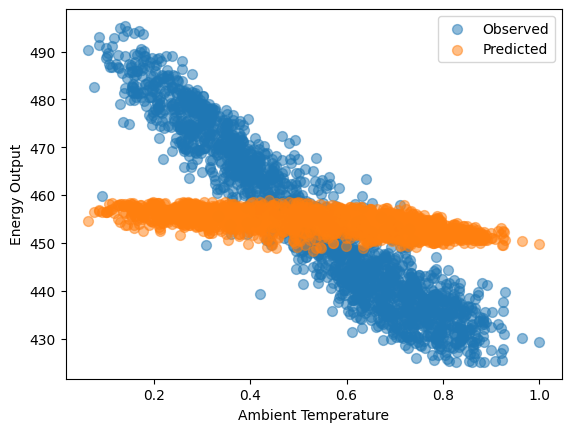

In [21]:
# Fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Data
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

# Manual normalization
X = X / X.max()
y = y / y.max()
# Convert to PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).squeeze()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-layer non-linear
model_1 = nn.Sequential(
    nn.Linear(in_features=4, out_features=32),
    nn.RReLU(),
    # hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),
    # moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),
    # hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4),
    nn.RReLU(),
    # hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1),
    # predicted weights
)

# Create a loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)  # Increased learning rate to 0.01

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    #Training
    # this allows our matrices to update
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred.squeeze(), y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Testing
    model_1.eval()  # forces our matrices to stay the same
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred.squeeze(), y_test)
    # Print
    if epoch % 200 == 0:  # prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

#evaluation mode
model_1.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_1(X_test)

# Diagnostic print to verify predictions
print(f"y_preds shape: {y_preds.shape}, range: {y_preds.min().item():.2f} to {y_preds.max().item():.2f}")
print(f"y_test shape: {y_test.shape}, range: {y_test.min().item():.2f} to {y_test.max().item():.2f}")

# Denormalize predictions and test data for plotting
y_preds_denorm = y_preds * combined_cycle_power_plant.data.targets.max().values[0]
y_test_denorm = y_test * combined_cycle_power_plant.data.targets.max().values[0]

# Plots predictions
plt.figure()
plt.scatter(X_test[:, 0].detach().numpy(), y_test_denorm.detach().numpy(), label='Observed', alpha=0.5, s=50)
plt.scatter(X_test[:, 0].detach().numpy(), y_preds_denorm.detach().numpy(), label='Predicted', alpha=0.5, s=50)
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output')
plt.legend()

I also adjusted the learning rate from 0.0001 to 0.01. This should allow faster updates and help the model converge. The train loss and test loss are no longer showing up as nan! and the predicted data ended up showing on the plot now, but it's almost completely horizontal and does not match well with the observed data. The model is poor.

Epoch: 0 | Train loss: 1.50057, Test loss: 1.48482
Epoch: 500 | Train loss: 0.00148, Test loss: 0.00145
Epoch: 1000 | Train loss: 0.00084, Test loss: 0.00083
Epoch: 1500 | Train loss: 0.00082, Test loss: 0.00081
Epoch: 2000 | Train loss: 0.00080, Test loss: 0.00079
Epoch: 2500 | Train loss: 0.00077, Test loss: 0.00076
Epoch: 3000 | Train loss: 0.00075, Test loss: 0.00074
Epoch: 3500 | Train loss: 0.00073, Test loss: 0.00072
Epoch: 4000 | Train loss: 0.00071, Test loss: 0.00070
Epoch: 4500 | Train loss: 0.00069, Test loss: 0.00068
y_preds shape: torch.Size([1914, 1]), range: 0.80 to 0.96
y_test shape: torch.Size([1914]), range: 0.86 to 1.00


(400.0, 500.0)

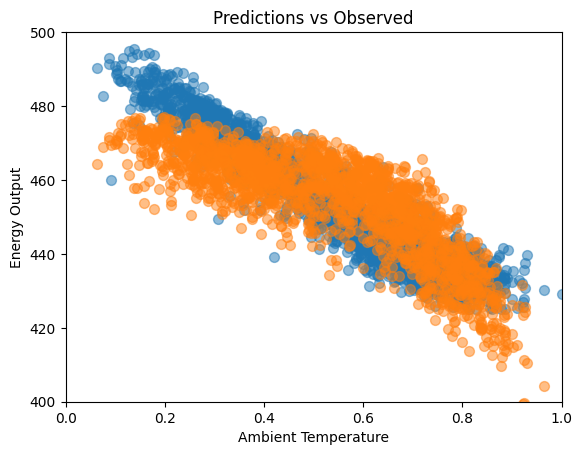

In [25]:

# Fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Data (as pandas dataframes)
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

X = X / X.max()
y = y / y.max()

# Convert to PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).squeeze()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = nn.Sequential(
    nn.Linear(in_features=4, out_features=32),
    nn.ReLU(),
    # hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16),
    nn.ReLU(),
    # hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=1),
    # outputs a vector of predicted weights
)

# Create a loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)  # Adjusted learning rate to 0.001

epochs = 5000

for epoch in range(epochs):
    # Training
    # update mtracies
    model_1.train()
    y_pred = model_1(X_train)
    # Calculate loss
    loss = loss_fn(y_pred.squeeze(), y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #Testing
    model_1.eval()  # forces matrices to stay the same
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred.squeeze(), y_test)
    # Print
    if epoch % 500 == 0:  # prints every 500 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

# Turn on evaluation mode
model_1.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_1(X_test)

# Diagnostic print to verify predictions
print(f"y_preds shape: {y_preds.shape}, range: {y_preds.min().item():.2f} to {y_preds.max().item():.2f}")
print(f"y_test shape: {y_test.shape}, range: {y_test.min().item():.2f} to {y_test.max().item():.2f}")

# Denormalize predictions and test data for plotting
y_max = combined_cycle_power_plant.data.targets.max().values[0]
y_preds_denorm = y_preds * y_max
y_test_denorm = y_test * y_max

# Plots predictions
plt.figure()
plt.scatter(X_test[:, 0].detach().numpy(), y_test_denorm.detach().numpy(), label='Observed', alpha=0.5, s=50)
plt.scatter(X_test[:, 0].detach().numpy(), y_preds_denorm.detach().numpy(), label='Predicted', alpha=0.5, s=50)
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output')
plt.title('Predictions vs Observed')
plt.xlim(0, 1)  # Ensure x-axis covers normalized AT
plt.ylim(400, 500)  # Set y-axis to cover PE range

I dropped the learning rate, which controls how fast the model learns from 0.01 to 0.001, and increased the training time from 2000 to 5000 epochs, so the model learns more carefully but takes longer. The code now prints progress every 500 rounds instead of 200.I also played around with the layers and ended up changing to less to make it simpler.

The model is now matching up much nicer!